<a href="https://colab.research.google.com/github/yejin0455/sesac-DL/blob/main/D14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

In [ ]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train_scaled = (X_train / 255.0)
X_train_scaled.shape

(60000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_val_scaled, y_train, y_val = \
  train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
X_train_scaled.shape, X_val_scaled.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [ ]:
def model_fn2(*layers):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28, 28), name="input"))
  model.add(keras.layers.Dense(100, activation='relu', name="hidden_1"))
  for layer in layers:
    model.add(layer)
  model.add(keras.layers.Dense(10, activation='softmax', name="output"))
  return model

In [ ]:
model = model_fn2()

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


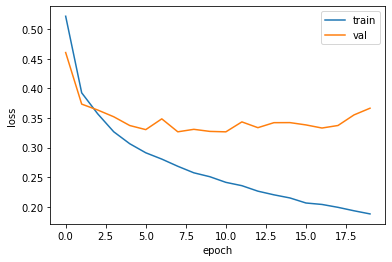

In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn2(keras.layers.Dropout(0.3))
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


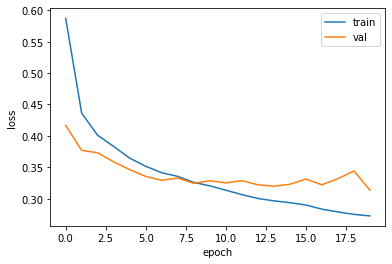

In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
models, histories = [], []
rates = np.arange(0.0, 0.5, 0.1)
for rate in rates:
  model = model_fn2(keras.layers.Dropout(0.3))
  model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))
  models.append(model)
  histories.append(history)

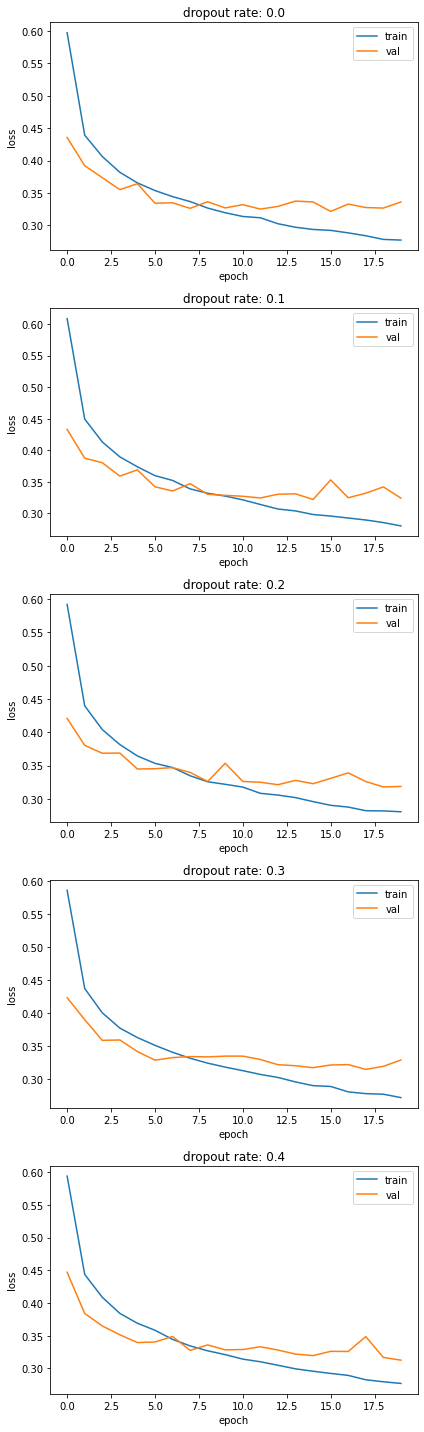

In [ ]:
fig, axes = plt.subplots(rates.size, 1, figsize=(6, 20))
for i, ax in enumerate(axes):
  ax.plot(histories[i].history['loss'])
  ax.plot(histories[i].history['val_loss'])
  ax.set_title(f"dropout rate: {rates[i]:.1f}")
  ax.set_xlabel('epoch')
  ax.set_ylabel('loss')
  ax.legend(['train', 'val'])
plt.tight_layout()
plt.show()

In [ ]:
models

In [ ]:
model = models[4]

In [ ]:
model.layers

In [ ]:
model.layers[2]

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save_weights('model-drop-0_3-weights.h5')

In [ ]:
model = model_fn2()
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))

In [ ]:
model.load_weights('model-drop-0_3-weights.h5')

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(X_val_scaled)

array([[5.98577135e-15, 9.55316157e-16, 4.53721033e-15, ...,
        7.63483650e-14, 9.99994636e-01, 1.24056975e-15],
       [8.03702790e-07, 1.99149491e-14, 3.85974364e-09, ...,
        3.66999513e-15, 9.99996543e-01, 1.11039385e-13],
       [1.00627124e-14, 7.97103498e-18, 2.50119515e-17, ...,
        9.99983549e-01, 2.45918563e-12, 1.50234438e-08],
       ...,
       [3.16486112e-05, 3.81247846e-11, 3.87982491e-09, ...,
        9.85944104e-10, 9.99967217e-01, 7.06366410e-10],
       [5.03124521e-11, 2.39667757e-17, 1.06190291e-11, ...,
        2.11581525e-13, 1.00000000e+00, 2.69973863e-14],
       [4.95783031e-01, 5.81657332e-07, 8.90251156e-03, ...,
        1.46240997e-03, 1.70274382e-06, 1.77285485e-02]], dtype=float32)

In [ ]:
model = model_fn2(keras.layers.Dense(10, activation="relu"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))

In [ ]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.load_weights('model-drop-0_3-weights.h5')

ValueError: ignored

In [ ]:
model.save('model-hidden-2.h5')

In [ ]:
new_model = keras.models.load_model('model-hidden-2.h5')
new_model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test_scaled = (X_test / 255.0)
X_test_scaled.shape

(10000, 28, 28)

In [ ]:
new_model.predict(X_test_scaled[0:1])

array([[5.4883076e-09, 7.0027897e-07, 3.6356540e-09, 8.4367269e-07,
        8.7484216e-07, 6.3927649e-07, 6.7987900e-09, 1.0346582e-03,
        9.0401549e-08, 9.9896216e-01]], dtype=float32)

In [ ]:
y_test_pred_proba = new_model.predict(X_test_scaled)
y_test_pred_proba.shape

(10000, 10)

In [ ]:
np.argmax(y_test_pred_proba, axis=1).shape

(10000,)

In [ ]:
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
np.sum(y_test_pred == y_test)

8838

In [ ]:
np.mean(y_test_pred == y_test)

0.8838

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3732 - accuracy: 0.8838


[0.3731763958930969, 0.8838000297546387]

In [ ]:
model = model_fn2(keras.layers.Dropout(0.3), keras.layers.Dense(10, activation="relu"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model_chkpoint = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, \
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[model_chkpoint, early_stopping])

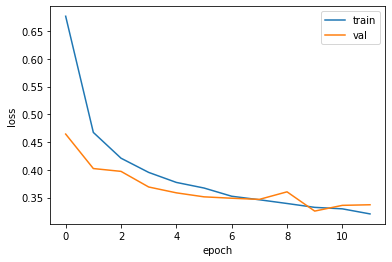

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
early_stopping.stopped_epoch - 2 # patience=2

9